# Project Title : COVID19 prediction using Machine Learning 

## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. Test_date
2. Cough_symptoms
3. Fever
4. Score_throat
5. Shortness_of_bread
6. Headache 
7. SEX
## Ordinal :
8. Corona
9. Age_60_above
10. Known_contact
## DISCRETE: 
11. Ind_ID

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [14]:
import xgboost as xgb

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
df=pd.read_csv('corona_tested.csv')

C:\Users\himanshu\AppData\Local\Temp\ipykernel_7108\2500322963.py:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('corona_tested.csv')


In [18]:
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [19]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [20]:
df.describe()

,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
25%,69712.750000
50%,139424.500000
75%,209136.250000
max,278848.000000


In [21]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [23]:
def Convert(val):
    val=str(val)
    if val=="False":
        return "FALSE"
    elif val=="True":
        return "TRUE"
    else:
        return val
    

In [24]:
df['Cough_symptoms']=df['Cough_symptoms'].apply(Convert)

In [25]:
df['Cough_symptoms'].value_counts()

FALSE    236368
TRUE      42228
None        252
Name: Cough_symptoms, dtype: int64

In [26]:
df['Fever']=df['Fever'].apply(Convert)

In [27]:
df['Fever'].value_counts()

FALSE    256844
TRUE      21752
None        252
Name: Fever, dtype: int64

In [28]:
df['Sore_throat']=df['Sore_throat'].apply(Convert)

In [29]:
df['Sore_throat'].value_counts()

FALSE    276921
TRUE       1926
None          1
Name: Sore_throat, dtype: int64

In [30]:
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(Convert)

In [31]:
df['Shortness_of_breath'].value_counts()

FALSE    277270
TRUE       1577
None          1
Name: Shortness_of_breath, dtype: int64

In [32]:
df['Headache'].value_counts()

False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64

In [33]:
df['Headache']=df['Headache'].apply(Convert)

In [34]:
df['Headache'].value_counts()

FALSE    276433
TRUE       2414
None          1
Name: Headache, dtype: int64

In [35]:
df['Age_60_above'].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [36]:
df['Sex'].value_counts()

female    130158
male      129127
None       19563
Name: Sex, dtype: int64

In [37]:
df['Known_contact'].value_counts()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

In [38]:
df['Age_60_above'].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

<AxesSubplot:xlabel='Cough_symptoms', ylabel='count'>

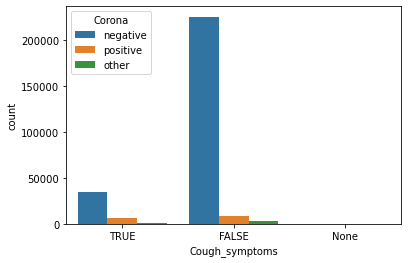

In [39]:
sns.countplot(x=df['Cough_symptoms'],hue=df['Corona'])

In [40]:
label_df=df.groupby('Cough_symptoms')['Corona'].value_counts().index


In [41]:
val_df=df.groupby('Cough_symptoms')['Corona'].value_counts().values


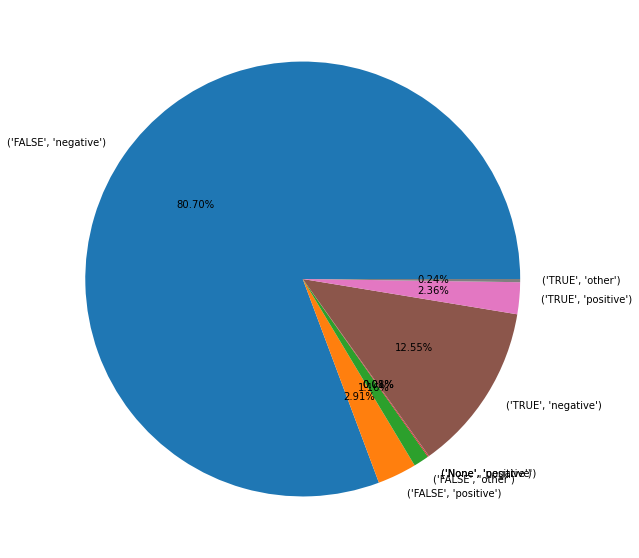

In [42]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. If no Cough_symptoms than Corona is negative in maximum number of people.

<AxesSubplot:xlabel='Shortness_of_breath', ylabel='count'>

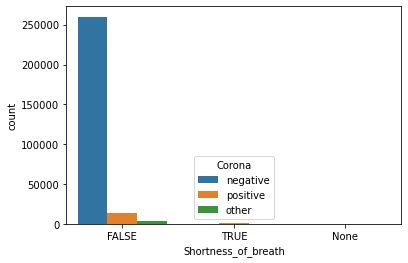

In [43]:
sns.countplot(x=df['Shortness_of_breath'],hue=df['Corona'])

# Observations:
1. If no shortness_of_breath than Corona is negative in maximum number of people

In [44]:
label_df=df.groupby('Shortness_of_breath')['Corona'].value_counts().index


In [45]:
val_df=df.groupby('Shortness_of_breath')['Corona'].value_counts().values


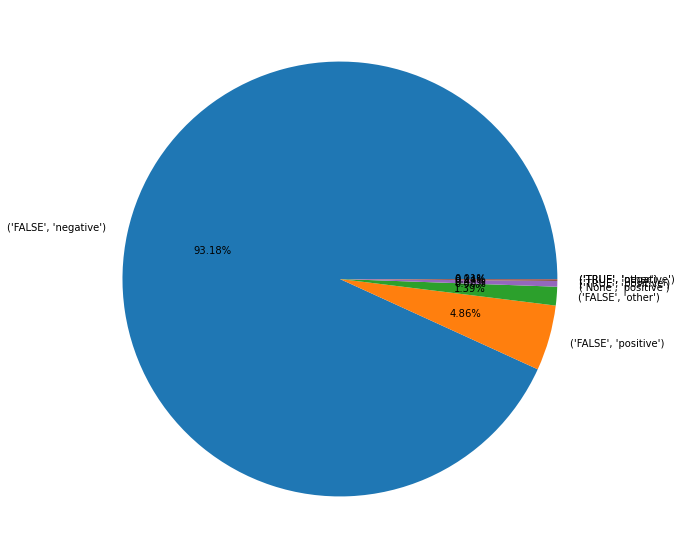

In [46]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Fever', ylabel='count'>

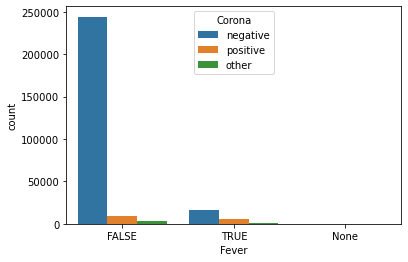

In [47]:
sns.countplot(x=df['Fever'],hue=df['Corona'])

# Observations:
1. If no Fever than Corona is negative in maximum number of people.

In [48]:
label_df=df.groupby('Fever')['Corona'].value_counts().index


In [49]:
val_df=df.groupby('Fever')['Corona'].value_counts().values


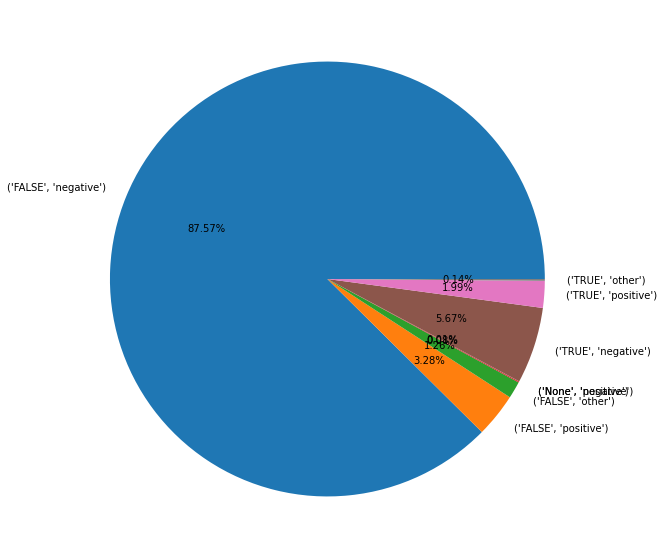

In [50]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Headache', ylabel='count'>

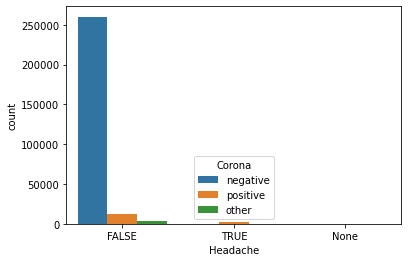

In [51]:
sns.countplot(x=df['Headache'],hue=df['Corona'])

# Observations:
1. If no Headache than Corona is negative in maximum number of people

In [52]:
label_df=df.groupby('Headache')['Corona'].value_counts().index


In [53]:
val_df=df.groupby('Headache')['Corona'].value_counts().values


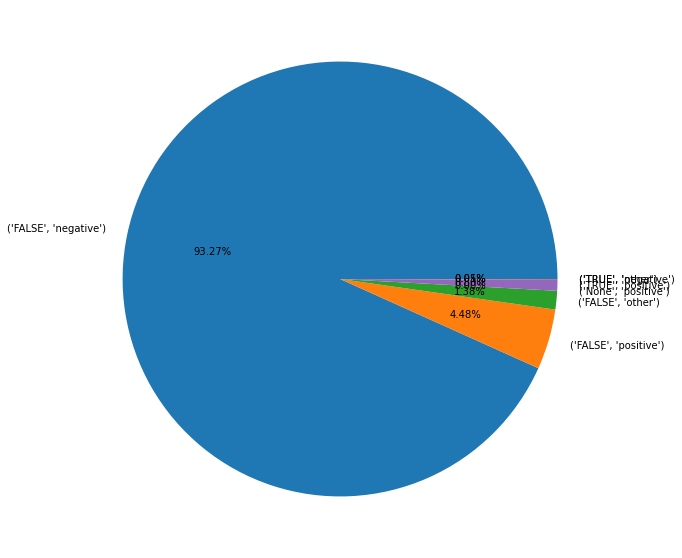

In [54]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Sore_throat', ylabel='count'>

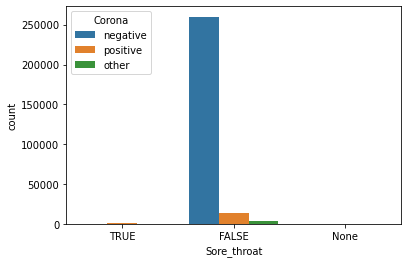

In [55]:
sns.countplot(x=df['Sore_throat'],hue=df['Corona'])

# Observations:
1. If no Sore_throat than Corona is negative in maximum number of people

In [56]:
label_df=df.groupby('Sore_throat')['Corona'].value_counts().index


In [57]:
val_df=df.groupby('Sore_throat')['Corona'].value_counts().values


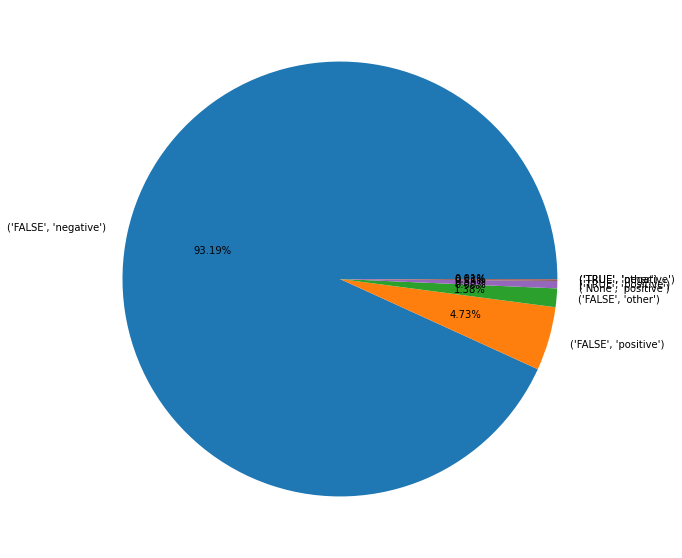

In [58]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_60_above', ylabel='count'>

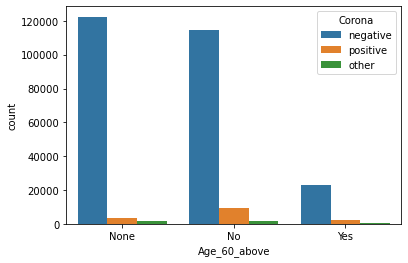

In [59]:
sns.countplot(df['Age_60_above'],hue=df['Corona'])

# Observations:
1. If age is not known than Corona is negative in maximum number of people.
2. If age is below or equal to 60 than Corona is negative in maximum number of people.
3. If age is above 60 than Corona is negative in maximum number of people.


In [60]:
label_df=df.groupby('Age_60_above')['Corona'].value_counts().index


In [61]:
val_df=df.groupby('Age_60_above')['Corona'].value_counts().values


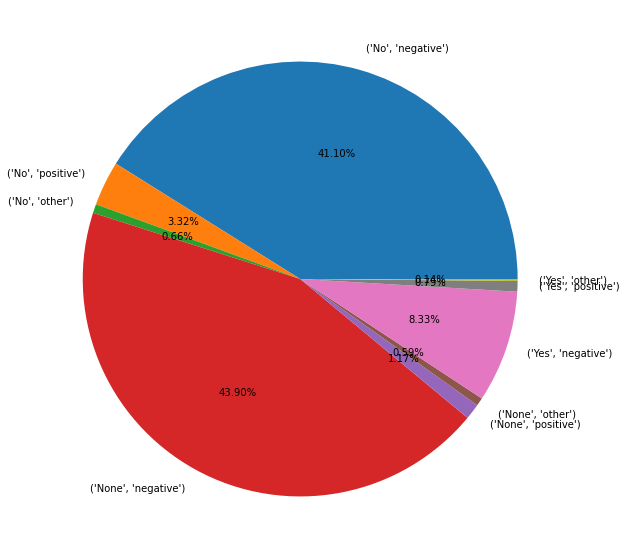

In [62]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

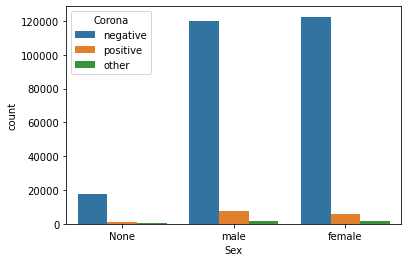

In [63]:
sns.countplot(df['Sex'],hue=df['Corona'])

# Observations:
1. Maximum Females are Corona negative as compared to male and None.

In [64]:
label_df=df.groupby('Sex')['Corona'].value_counts().index


In [65]:
val_df=df.groupby('Age_60_above')['Corona'].value_counts().values


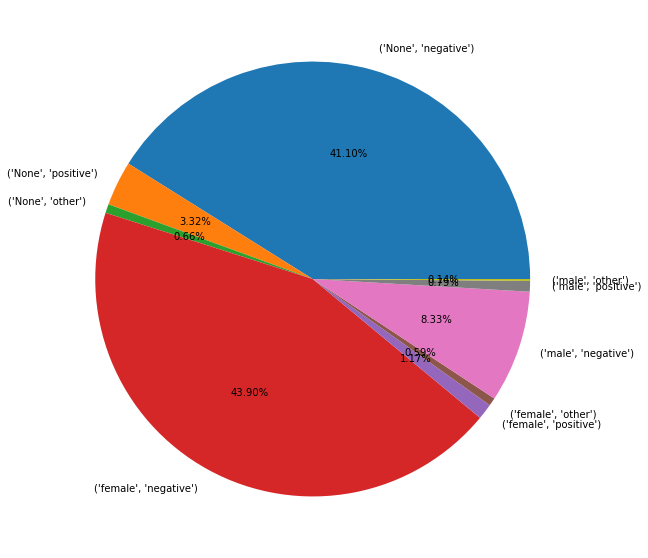

In [66]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Known_contact', ylabel='count'>

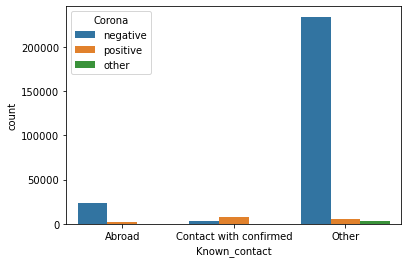

In [67]:
sns.countplot(df['Known_contact'],hue=df['Corona'])

# Observations:
1. Persons with Known_contact have maximum corona negative as compared to contact with confirmed and abroad 

In [68]:
label_df=df.groupby('Known_contact')['Corona'].value_counts().index


In [69]:
val_df=df.groupby('Known_contact')['Corona'].value_counts().values


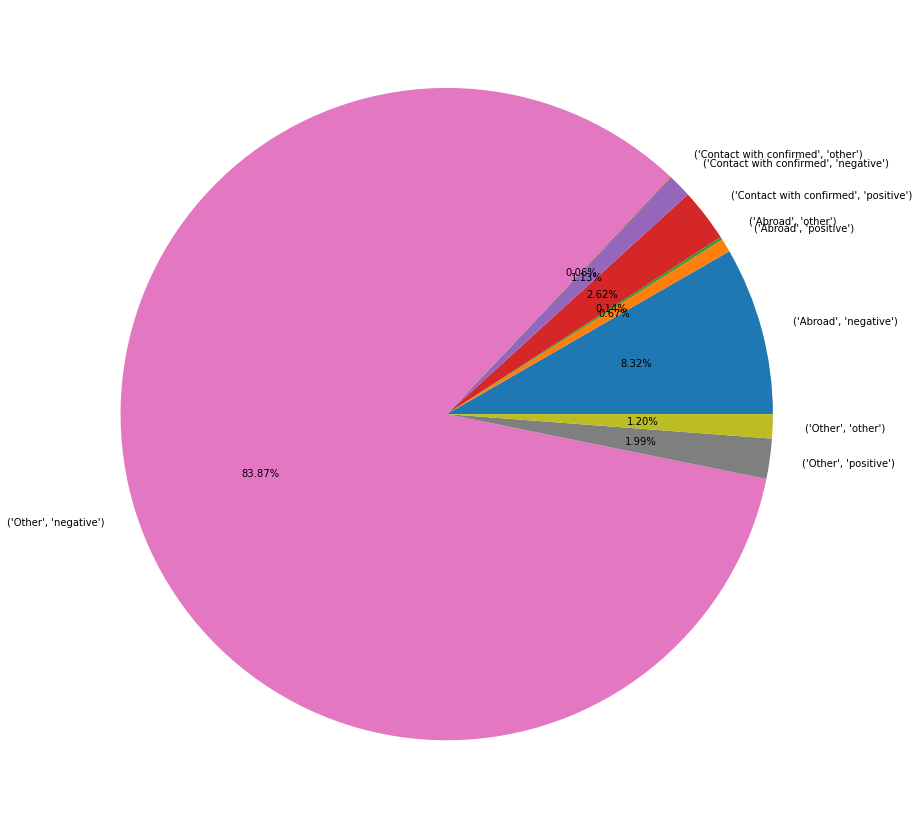

In [70]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


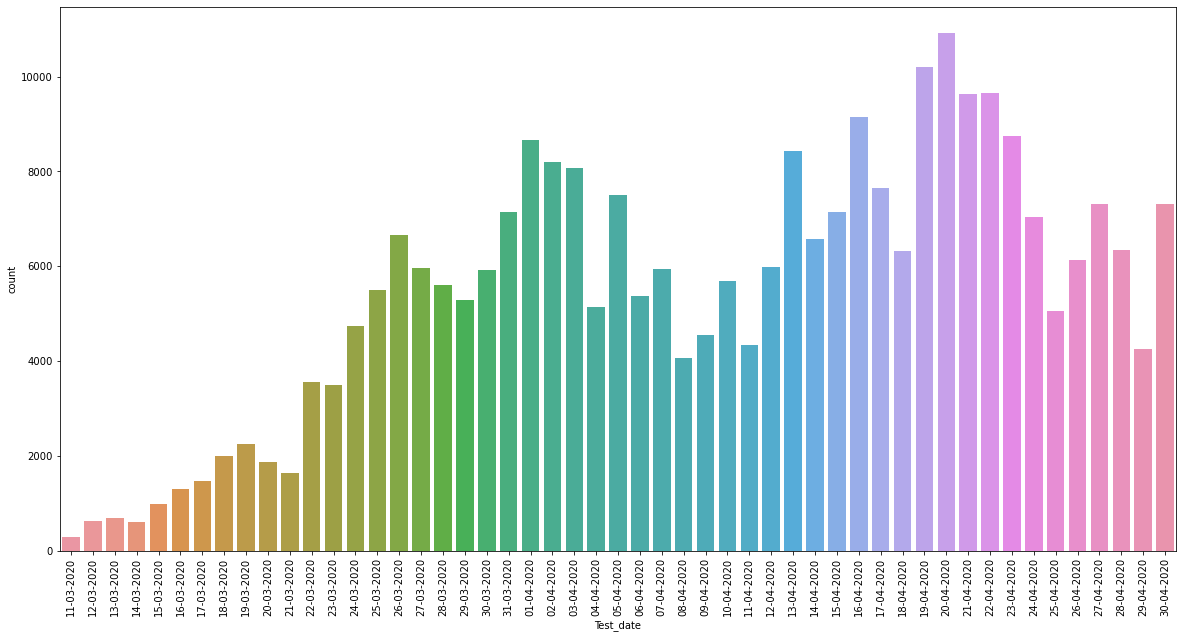

In [71]:
plt.figure(figsize=(20,10))
sns.countplot(df['Test_date'])
plt.xticks(rotation=90)
plt.show()

In [72]:
df.groupby('Test_date').size().sort_values(ascending=False)

Test_date
20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020     3494
19-03-2020     2243
18-03-2020     1991
20-03-2020     1870
21-03-2020     1648
17-03-2020     1463
16-03-2020     1304
15-03-2020      985
13-03-2020      686
12-03-2020      634
14-03-2020

# Observations:
1. Maximum number of covid test happnes on 20-04-2020
2. Minimum number of covid test happnes on 11-03-2020

In [73]:
label_df=df.groupby('Test_date').size().sort_values(ascending=False).index


In [74]:
val_df=df.groupby('Test_date').size().sort_values(ascending=False).values


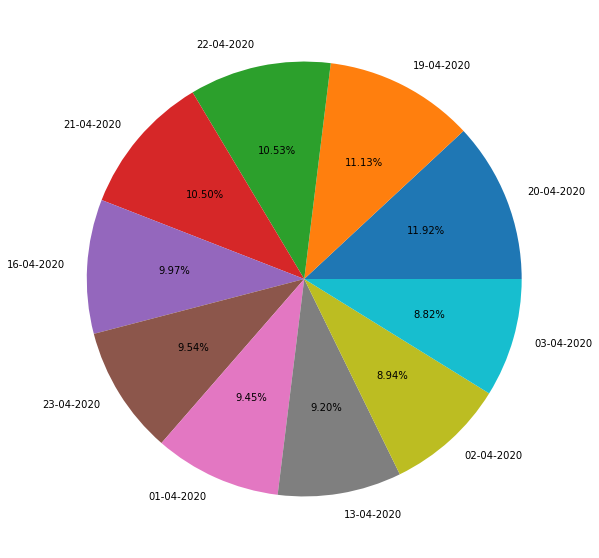

In [75]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

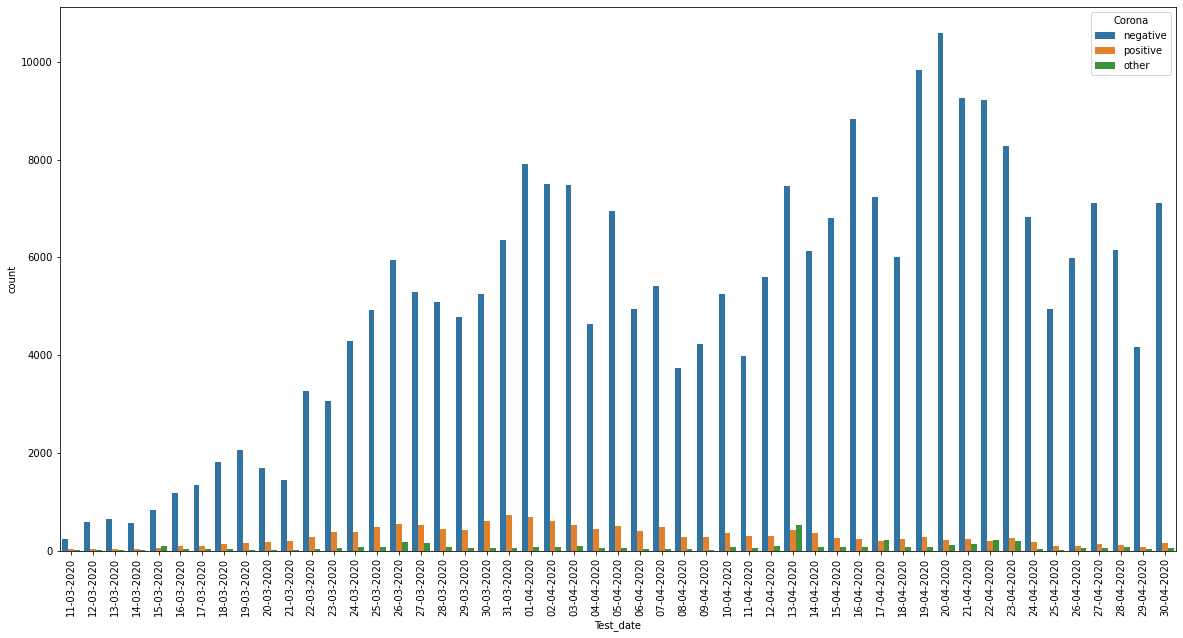

In [76]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Test_date'],hue=df['Corona'])
plt.xticks(rotation=90)
plt.show()

In [77]:
df.groupby('Test_date')['Corona'].value_counts().sort_values(ascending=False)

Test_date   Corona  
20-04-2020  negative    10590
19-04-2020  negative     9840
21-04-2020  negative     9250
22-04-2020  negative     9218
16-04-2020  negative     8833
                        ...  
21-03-2020  other           9
11-03-2020  other           8
12-03-2020  other           4
14-03-2020  other           4
13-03-2020  other           4
Name: Corona, Length: 153, dtype: int64

# Observations:
1. Maximum number of negative covid cases was on 20-04-2020
2. Minimum number of negative covid cases was on 11-03-2020

In [78]:
label_df=df.groupby('Test_date')['Corona'].value_counts().sort_values(ascending=False).index


In [79]:
val_df=df.groupby('Test_date')['Corona'].value_counts().sort_values(ascending=False).values


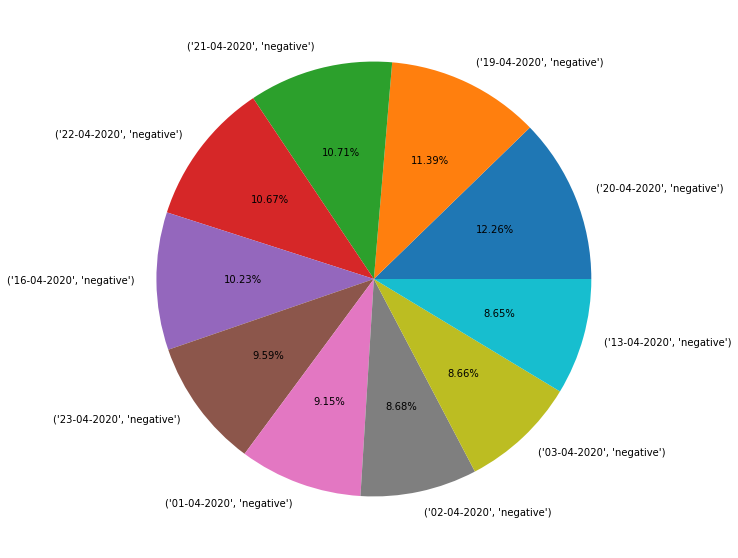

In [80]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

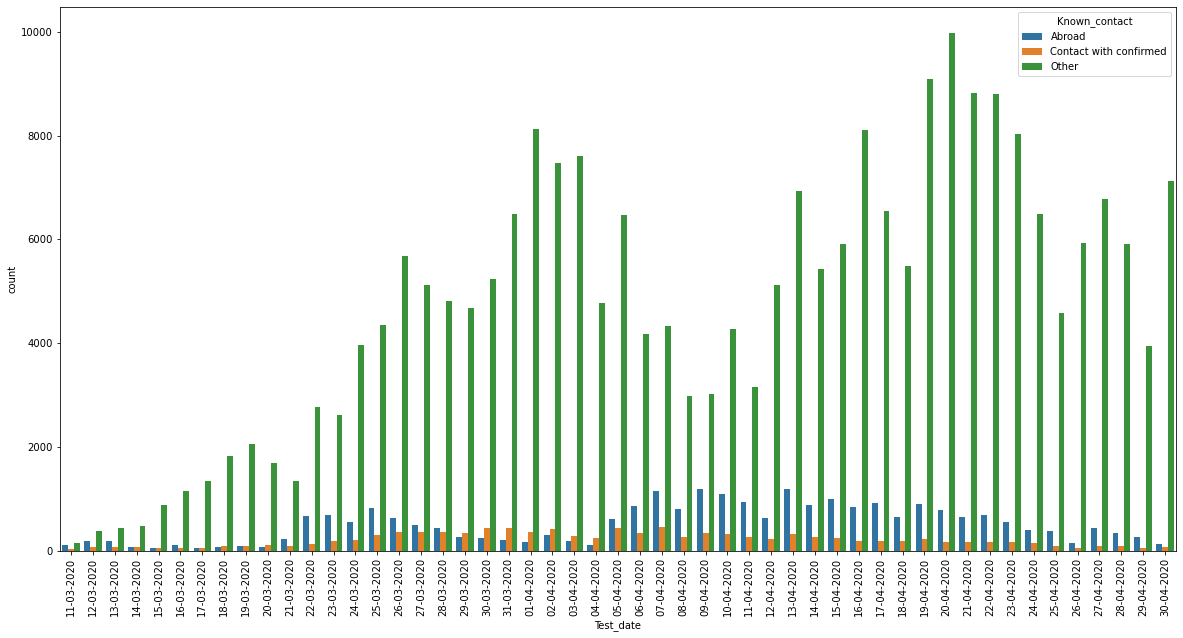

In [81]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Test_date'],hue=df['Known_contact'])
plt.xticks(rotation=90)
plt.show()

In [82]:
df.groupby('Test_date')['Known_contact'].value_counts().sort_values(ascending=False)

Test_date   Known_contact         
20-04-2020  Other                     9977
19-04-2020  Other                     9085
21-04-2020  Other                     8812
22-04-2020  Other                     8802
01-04-2020  Other                     8127
                                      ... 
17-03-2020  Contact with confirmed      55
29-04-2020  Contact with confirmed      52
26-04-2020  Contact with confirmed      50
15-03-2020  Contact with confirmed      44
11-03-2020  Contact with confirmed      31
Name: Known_contact, Length: 153, dtype: int64

# Observations:
1. Known_contact other is maximum on 20-04-2020.
2. Known_contact other is minimum on 11-03-2020.

In [83]:
label_df=df.groupby('Test_date')['Known_contact'].value_counts().sort_values(ascending=False).index


In [84]:
val_df=df.groupby('Test_date')['Known_contact'].value_counts().sort_values(ascending=False).values


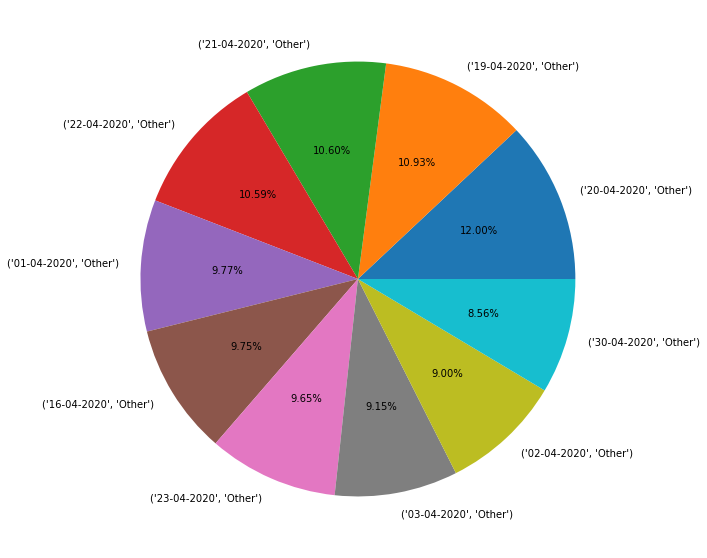

In [85]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

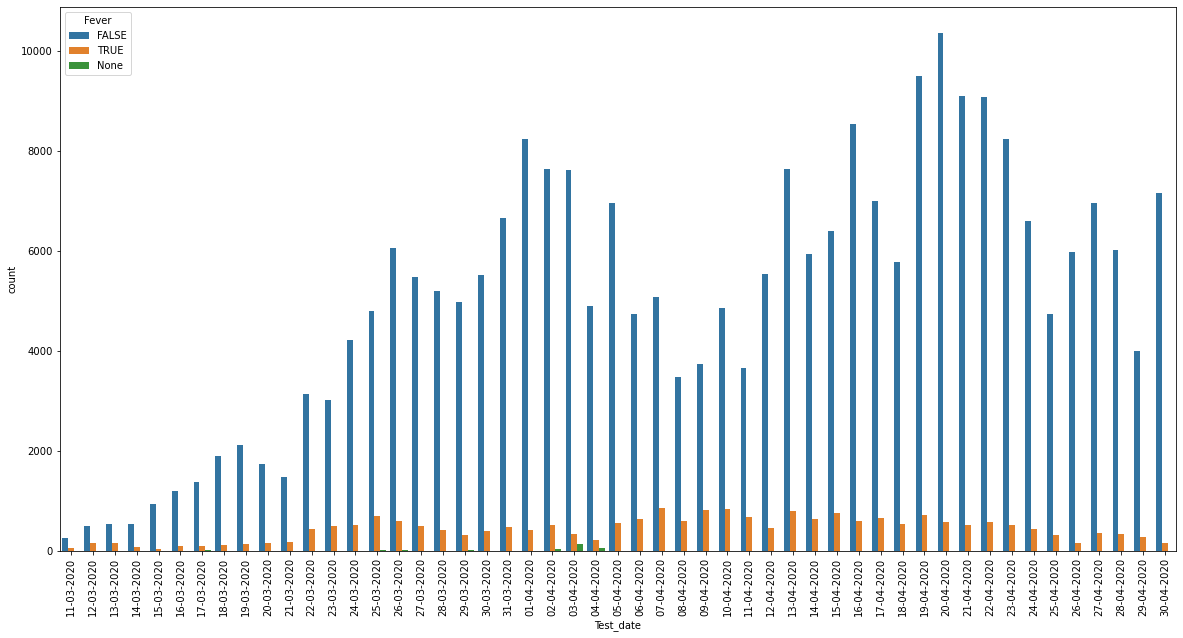

In [86]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Test_date'],hue=df['Fever'])
plt.xticks(rotation=90)
plt.show()

In [87]:
df.groupby('Test_date')['Fever'].value_counts().sort_values(ascending=False)

Test_date   Fever
20-04-2020  FALSE    10355
19-04-2020  FALSE     9484
21-04-2020  FALSE     9103
22-04-2020  FALSE     9065
16-04-2020  FALSE     8543
                     ...  
12-03-2020  None         1
05-04-2020  None         1
20-03-2020  None         1
15-03-2020  None         1
31-03-2020  None         1
Name: Fever, Length: 121, dtype: int64

# Observations:
1. On 20-04-2020 maximum number of people with no fever were tested for covid.

In [88]:
label_df=df.groupby('Test_date')['Fever'].value_counts().sort_values(ascending=False).index


In [89]:
val_df=df.groupby('Test_date')['Fever'].value_counts().sort_values(ascending=False).values


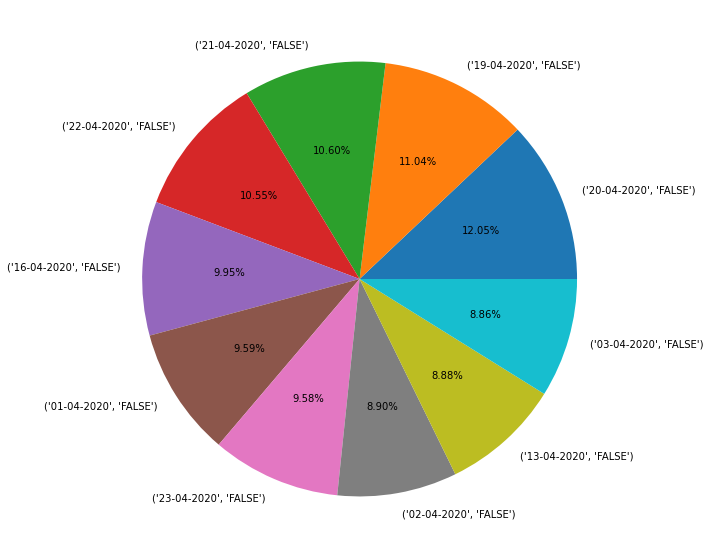

In [90]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [91]:
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,positive,None,male,Other
278844,278845,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other
278845,278846,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
278846,278847,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [93]:
df['Test_date']=pd.to_datetime(df['Test_date'])

C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-03-2020' in DD/MM/YYYY format. Provide form

In [94]:
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-11-03,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,2020-11-03,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,2020-11-03,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,2020-11-03,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,2020-11-03,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,positive,None,male,Other
278844,278845,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other
278845,278846,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
278846,278847,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other


In [95]:
df['Test_month']=df['Test_date'].dt.month


In [96]:
df['Test_year']=df['Test_date'].dt.year


In [97]:
df['Test_day']=df['Test_date'].dt.day


In [98]:
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Test_month,Test_year,Test_day
0,1,2020-11-03,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad,11,2020,3
1,2,2020-11-03,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad,11,2020,3
2,3,2020-11-03,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad,11,2020,3
3,4,2020-11-03,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad,11,2020,3
4,5,2020-11-03,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed,11,2020,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,positive,None,male,Other,4,2020,30
278844,278845,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other,4,2020,30
278845,278846,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other,4,2020,30
278846,278847,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other,4,2020,30


In [99]:
df.drop('Test_date',axis=1,inplace=True)

In [100]:
df

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Test_month,Test_year,Test_day
0,1,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad,11,2020,3
1,2,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad,11,2020,3
2,3,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad,11,2020,3
3,4,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad,11,2020,3
4,5,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed,11,2020,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,FALSE,FALSE,FALSE,FALSE,FALSE,positive,None,male,Other,4,2020,30
278844,278845,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other,4,2020,30
278845,278846,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other,4,2020,30
278846,278847,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other,4,2020,30


In [101]:
df['Corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [102]:
le=LabelEncoder()


In [103]:
df['Cough_symptoms']=le.fit_transform(df['Cough_symptoms'])


In [104]:
df['Fever']=le.fit_transform(df['Fever'])


In [105]:
df['Sore_throat']=le.fit_transform(df['Sore_throat'])


In [106]:
df['Shortness_of_breath']=le.fit_transform(df['Shortness_of_breath'])

In [107]:
df['Headache']=le.fit_transform(df['Headache'])

In [108]:
df['Age_60_above']=le.fit_transform(df['Age_60_above'])

In [109]:
df['Sex']=le.fit_transform(df['Sex'])

In [110]:
df['Known_contact']=le.fit_transform(df['Known_contact'])

In [111]:
df['Test_month']=le.fit_transform(df['Test_month'])

In [112]:
df['Test_year']=le.fit_transform(df['Test_year'])

In [113]:
df['Test_day']=le.fit_transform(df['Test_day'])

In [114]:
df['Corona']=le.fit_transform(df['Corona'])

In [115]:
df

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Test_month,Test_year,Test_day
0,1,2,0,2,0,0,0,1,0,0,10,0,0
1,2,0,2,0,0,0,2,1,0,0,10,0,0
2,3,0,2,0,0,0,2,1,0,0,10,0,0
3,4,2,0,0,0,0,0,1,0,0,10,0,0
4,5,2,0,0,0,0,0,1,0,1,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,0,0,0,0,0,2,1,2,2,3,0,19
278844,278845,0,0,0,0,0,0,1,1,2,3,0,19
278845,278846,0,0,0,0,0,0,1,2,2,3,0,19
278846,278847,0,0,0,0,0,0,1,2,2,3,0,19


In [116]:
df.describe()

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Test_month,Test_year,Test_day
count,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.0,278848.000000
mean,139424.500000,0.303778,0.156917,0.013818,0.011314,0.017318,0.119599,0.641819,1.392917,1.779181,3.277438,0.0,8.620098
std,80496.628269,0.717198,0.536944,0.165652,0.149991,0.185289,0.459280,0.644294,0.615506,0.595588,2.142283,0.0,6.393786
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,69712.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.0,1.000000
50%,139424.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,0.0,9.000000
75%,209136.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,0.0,14.000000
max,278848.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,0.0,20.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Test_month'>

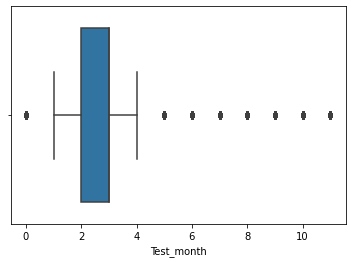

In [117]:
sns.boxplot(df['Test_month'])

In [118]:
q1=df['Test_month'].quantile(0.25)

In [119]:
q3=df['Test_month'].quantile(0.75)

In [120]:
IQR=q3-q1

In [121]:
lower=q1-1.5*IQR

In [122]:
higher=q3+1.5*IQR

In [123]:
df=df[(df['Test_month']>lower) & (df['Test_month']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Test_month'>

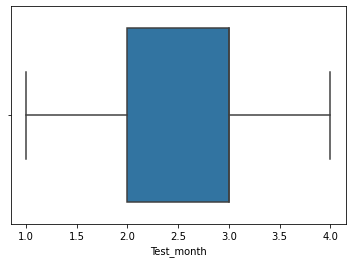

In [124]:
sns.boxplot(df['Test_month'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ind_ID'>

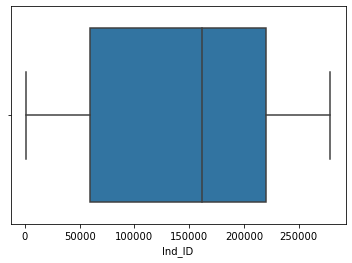

In [125]:
sns.boxplot(df['Ind_ID'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Test_day'>

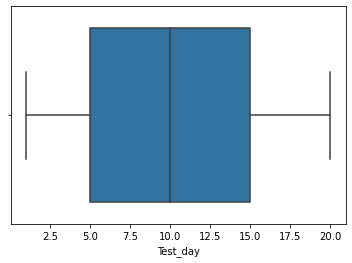

In [126]:
sns.boxplot(df['Test_day'])

<AxesSubplot:>

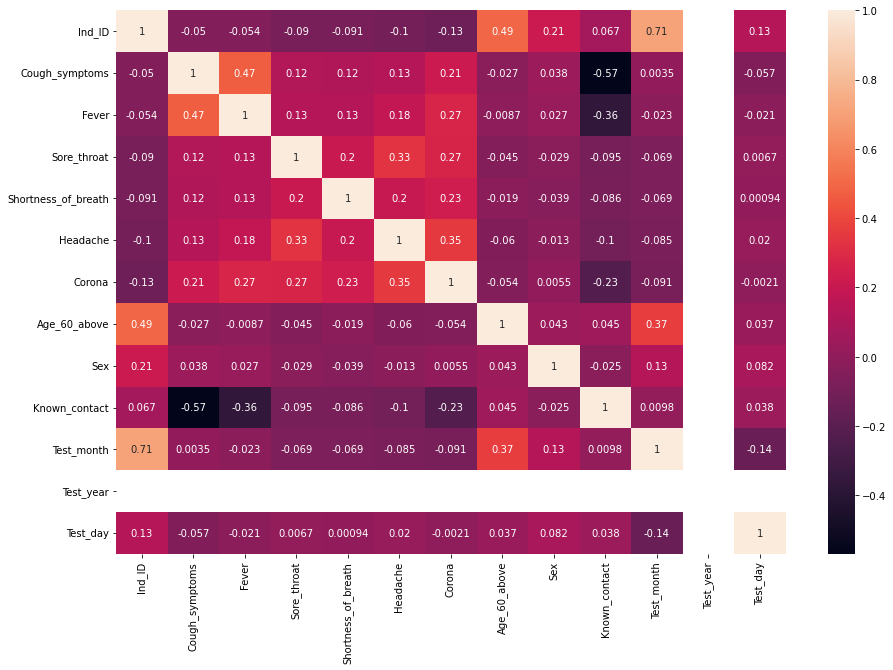

In [127]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)


In [128]:
df

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Test_month,Test_year,Test_day
928,929,0,0,0,0,0,0,1,0,2,2,0,2
929,930,0,0,0,0,0,0,1,0,2,2,0,2
930,931,0,0,0,0,0,2,1,0,1,2,0,2
931,932,2,2,0,0,0,2,1,0,0,2,0,2
932,933,2,0,0,0,0,0,1,0,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,0,0,0,0,0,2,1,2,2,3,0,19
278844,278845,0,0,0,0,0,0,1,1,2,3,0,19
278845,278846,0,0,0,0,0,0,1,2,2,3,0,19
278846,278847,0,0,0,0,0,0,1,2,2,3,0,19


In [129]:
y=df['Corona']

In [130]:
X=df.drop(['Corona','Ind_ID'],axis=1)

In [131]:
sc=StandardScaler()


In [132]:
X=sc.fit_transform(X)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [134]:
X_train.shape

(186693, 11)

In [135]:
y_train.shape

(186693,)

In [136]:
rfc=RandomForestClassifier()


In [137]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [138]:
y_pred=rfc.predict(X_test)


In [139]:
accuracy_score(y_test,y_pred)

0.9587779063290054

In [140]:
mean_squared_error(y_test,y_pred)

0.12085957920898145

In [141]:
confusion_matrix(y_test,y_pred)

array([[43266,     5,   371],
       [  648,     1,    30],
       [  868,     2,  1483]], dtype=int64)

In [142]:
knc=KNeighborsClassifier()


In [143]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [144]:
y_pred=knc.predict(X_test)


In [145]:
accuracy_score(y_test,y_pred)

0.9574066932339204

In [146]:
mean_squared_error(y_test,y_pred)

0.12570167545100056

In [147]:
confusion_matrix(y_test,y_pred)

array([[43203,    53,   386],
       [  607,    43,    29],
       [  907,     6,  1440]], dtype=int64)

In [148]:
dtc=DecisionTreeClassifier()


In [149]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [150]:
y_pred=dtc.predict(X_test)


In [151]:
accuracy_score(y_test,y_pred)

0.9578566225307452

In [152]:
mean_squared_error(y_test,y_pred)

0.12403050949136564

In [153]:
confusion_matrix(y_test,y_pred)

array([[43285,     6,   351],
       [  651,     2,    26],
       [  923,    10,  1420]], dtype=int64)

In [154]:
gbc=GradientBoostingClassifier()


In [155]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [156]:
y_pred=gbc.predict(X_test)


In [157]:
accuracy_score(y_test,y_pred)

0.9586065046921198

In [158]:
mean_squared_error(y_test,y_pred)

0.12193083943951664

In [159]:
confusion_matrix(y_test,y_pred)

array([[43232,     0,   410],
       [  650,     0,    29],
       [  843,     0,  1510]], dtype=int64)

In [160]:
xgb_i=xgb.XGBClassifier()

In [161]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [162]:
y_pred=xgb_i.predict(X_test)


In [163]:
accuracy_score(y_test,y_pred)

0.959613489308823

In [164]:
confusion_matrix(y_test,y_pred)

array([[43274,     1,   367],
       [  650,     0,    29],
       [  838,     0,  1515]], dtype=int64)

In [165]:
mean_squared_error(y_test,y_pred)

0.11783862535887217